In [25]:
import numpy as np
import pandas as pd
from scipy.io import wavfile
from egg_io import *
from fpca_preprocess import *
import matplotlib.pyplot as plt
all_data = pd.read_csv("voiceSauce.csv")
TIMEPOINT = 5

In [26]:
# TODO replace this with well thought out io function
for i, row in all_data.iterrows():
    if row.filename == "speaker3M_aC35_1":
        savedRow = row
        # break

In [27]:
samplerate, data = wavfile.read(filepath(savedRow))
startSample, endSample = sampleEndpoints(savedRow.segment_start, savedRow.segment_end, samplerate, timepoint = TIMEPOINT)
egg = data[startSample:endSample]

/var/folders/yw/bhpwdykx1ds4grc1_xcqh49r0000gn/T/ipykernel_58950/2311534566.py:1: WavFileWarning: Reached EOF prematurely; finished at 24326 bytes, expected 48572 bytes from header.
  samplerate, data = wavfile.read(filepath(savedRow))


In [28]:
peaks = pitchmark(egg, samplerate, savedRow.strF0)
threshold = find_threshold(egg, peaks)

<function matplotlib.pyplot.show(close=None, block=None)>

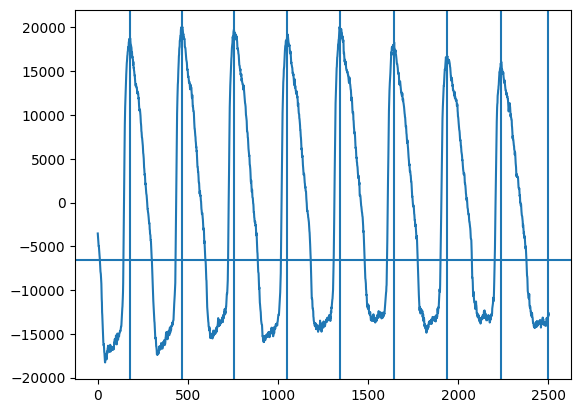

In [29]:
plt.plot(egg)
for peak in peaks:
    plt.axvline(peak)
plt.axhline(threshold)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

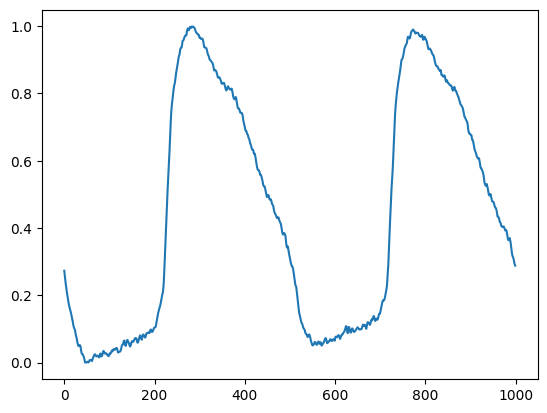

In [30]:
clipped_egg = clip_egg(egg, threshold, peaks[0])
final = normalize_egg(clipped_egg)

plt.plot(final)
plt.show